# PCA ANALYSIS NOTEBOOK

This notebook contains all implementation of the functions expressed in the PCA_implementation py file.

In [1]:
#IMPORTS
from PCA_Implementation import ScaleData, print_explained_var, plot_explained_var, compute_loadings, FindMostImportantFeature, plot_pc_loadings, Create_pc_plot
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

### Dataframe creation

In [2]:
#DATAFRAME THAT CONTAINS INHIBITION ABILLITY
test_df = pd.read_csv("data/tested_molecules.csv")

In [3]:
df_desc_2d = pd.read_csv("data/cleaned_2d_descriptors.csv").iloc[:,1:]
df_maccs = pd.read_csv("data/cleaned_maccs_keys.csv").iloc[:,1:]
df_fprint = pd.read_csv("data/cleaned_fingerprints.csv").iloc[:,1:]
df_mqn = pd.read_csv("data/cleaned_mqn.csv").iloc[:,1:]


Potential space for other dataframes to be analyzed:

In [17]:
#ADD DATAFRAME LOADING HERE.

### Setting dataframe to be PCA'd

In [18]:
#USED DATAFRAME:
pca_df = df_desc_2d

### PERFORMING DATA SCALING

In [19]:
scale_method = 'MinMax'
scaled_df = ScaleData(pca_df, mode=scale_method)

### Creating PCA object

In [20]:
pca = PCA(scaled_df.shape[1]) #n_components is set to reach 100% explained variance

#Fitting the PCA object to the scaled data and extracting the score data for later use
score_df = pca.fit_transform(scaled_df)

### Performing PCA Analysis

First, we print the individual and cumulative explained variance of every PC

In [9]:
print_explained_var(pca,maxpc=None)

Principal component 1 Explains 10.9417795105437 % of all variance
The total amount of explained variance for 1 Principal components equals 10.9417795105437 %
Principal component 2 Explains 8.557202392899846 % of all variance
The total amount of explained variance for 2 Principal components equals 19.498981903443546 %
Principal component 3 Explains 6.5101943375868725 % of all variance
The total amount of explained variance for 3 Principal components equals 26.009176241030417 %
Principal component 4 Explains 6.10013585074084 % of all variance
The total amount of explained variance for 4 Principal components equals 32.10931209177126 %
Principal component 5 Explains 4.674346138608978 % of all variance
The total amount of explained variance for 5 Principal components equals 36.78365823038023 %
Principal component 6 Explains 4.131227725537872 % of all variance
The total amount of explained variance for 6 Principal components equals 40.91488595591811 %
Principal component 7 Explains 3.5420546

Now we generate two plots containing these individual and cumulative explained variance

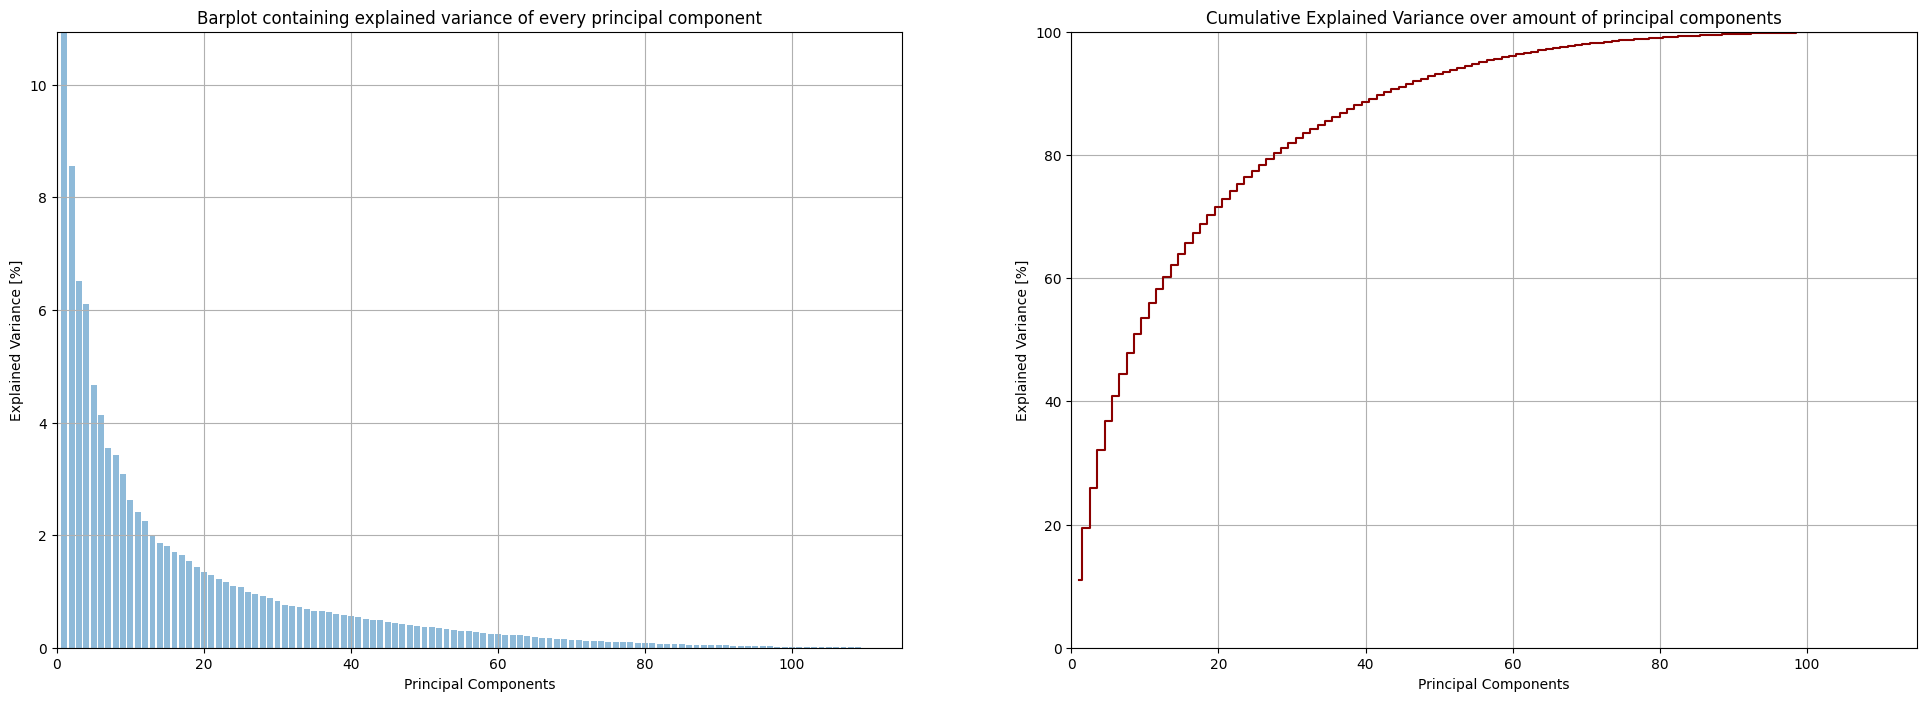

In [10]:
plot_explained_var(pca,maxpc=None)

After this, we compute the loadings of every feature of a certain PC

In [11]:
loadings_array = compute_loadings(pca)

These loadings can then be used to determine the most relevant feature to a chosen PC

In [12]:
pc_num = 1 #CHOOSE PRINCIPAL COMPONENT TO BE ANALYZED
print(type(scaled_df))
important_ft = FindMostImportantFeature(pca_df,loadings_array,pc_num)

<class 'pandas.core.frame.DataFrame'>
['MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'MaxPartialCharge', 'MinPartialCharge', 'FpDensityMorgan1', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'AvgIpc', 'BalabanJ', 'HallKierAlpha', 'Ipc', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA7', 'SlogP_VSA8', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9',

Furthermore, the loadings can also be plotted

In [13]:
#SETTING PC'S TO BE DEPICTED ON X AND Y AXIS OF LOADINGS PLOT
x_pc = 1
y_pc = 2

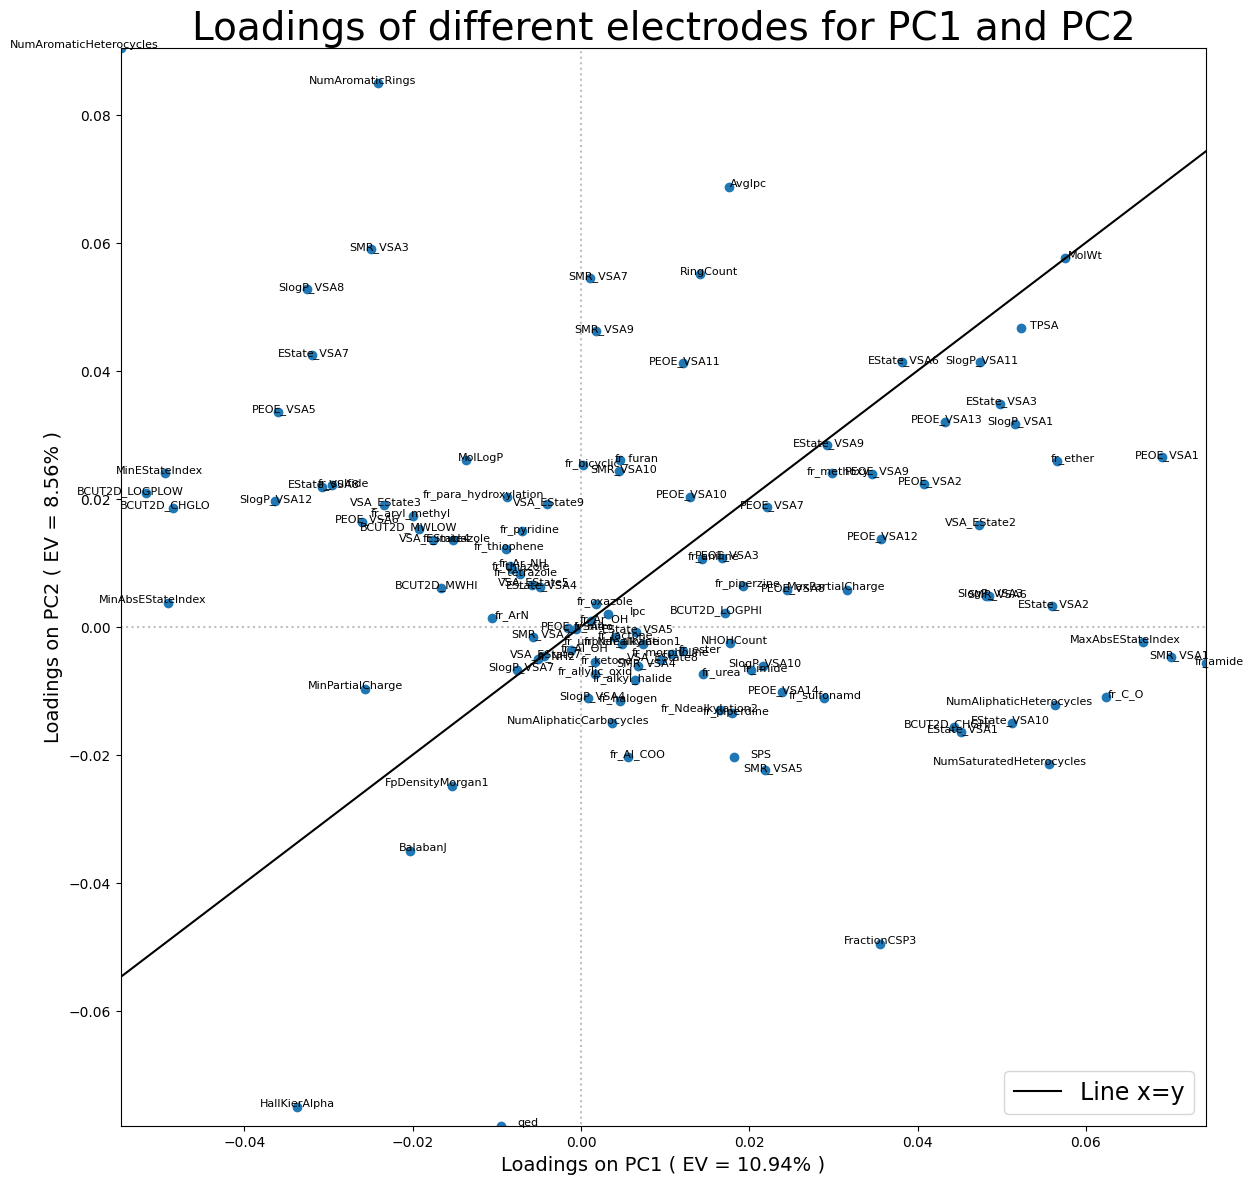

In [14]:
plot_pc_loadings(pca_df,pca,loadings_array,x_pc, y_pc)

Lastly, the earlier computed PC scores can be plotted to find any distinct groups:

In [15]:
#SETTING PC'S TO BE DEPCITED ON X AND Y AXIS OF THE SCORES PLOT
pcx = 1
pcy = 2

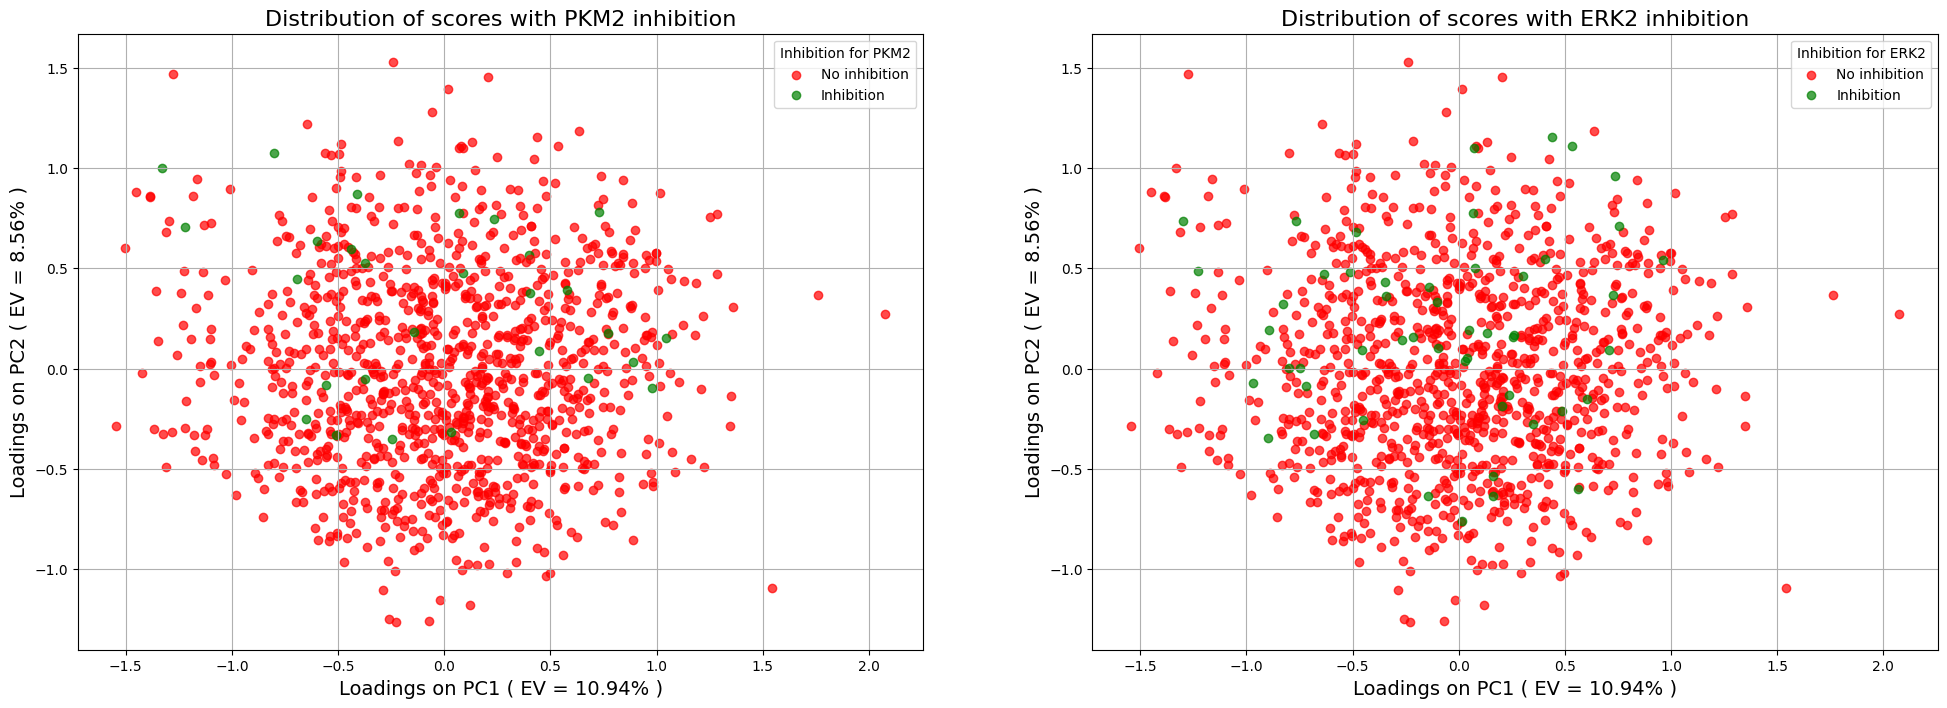

In [16]:
#color codes and label codes can be changed to result in different plot/legend
Create_pc_plot(pca, pcx, pcy, score_df,test_df,color_codes = {0:'red',1:'green'},
                   label_codes= {0:'No inhibition',1:'Inhibition'}, saveIMG=False, Filename='plot.png')

# Summarised results for each dataset

In [11]:
def all_PCA_steps(pca_df):
    '''examine and plot PCA characteristics for any dataset
    '''
    scale_method = 'MinMax'
    scaled_df = ScaleData(pca_df, mode=scale_method)
    pca = sklearn.decomposition.PCA(scaled_df.shape[1]) #n_components is set to reach 100% explained variance

    #Fitting the PCA object to the scaled data and extracting the score data for later use
    score_df = pca.fit_transform(scaled_df)
    print_explained_var(pca,maxpc=None)
    plot_explained_var(pca,maxpc=None)
    loadings_array = compute_loadings(pca)
    pc_num = 1 #CHOOSE PRINCIPAL COMPONENT TO BE ANALYZED
    print(type(scaled_df))
    important_ft = FindMostImportantFeature(pca_df,loadings_array,pc_num)
        #SETTING PC'S TO BE DEPICTED ON X AND Y AXIS OF LOADINGS PLOT
    x_pc = 1
    y_pc = 2
    plot_pc_loadings(pca_df,pca,loadings_array,x_pc, y_pc)
    #color codes and label codes can be changed to result in different plot/legend
    #SETTING PC'S TO BE DEPCITED ON X AND Y AXIS OF THE SCORES PLOT
    pcx = 1
    pcy = 2
    Create_pc_plot(pca, pcx, pcy, score_df,test_df,color_codes = {0:'red',1:'green'},
                       label_codes= {0:'No inhibition',1:'Inhibition'}, saveIMG=False, Filename='plot.png')

Principal component 1 Explains 10.9417795105437 % of all variance
The total amount of explained variance for 1 Principal components equals 10.9417795105437 %
Principal component 2 Explains 8.557202392899846 % of all variance
The total amount of explained variance for 2 Principal components equals 19.498981903443546 %
Principal component 3 Explains 6.5101943375868725 % of all variance
The total amount of explained variance for 3 Principal components equals 26.009176241030417 %
Principal component 4 Explains 6.10013585074084 % of all variance
The total amount of explained variance for 4 Principal components equals 32.10931209177126 %
Principal component 5 Explains 4.674346138608978 % of all variance
The total amount of explained variance for 5 Principal components equals 36.78365823038023 %
Principal component 6 Explains 4.131227725537872 % of all variance
The total amount of explained variance for 6 Principal components equals 40.91488595591811 %
Principal component 7 Explains 3.5420546

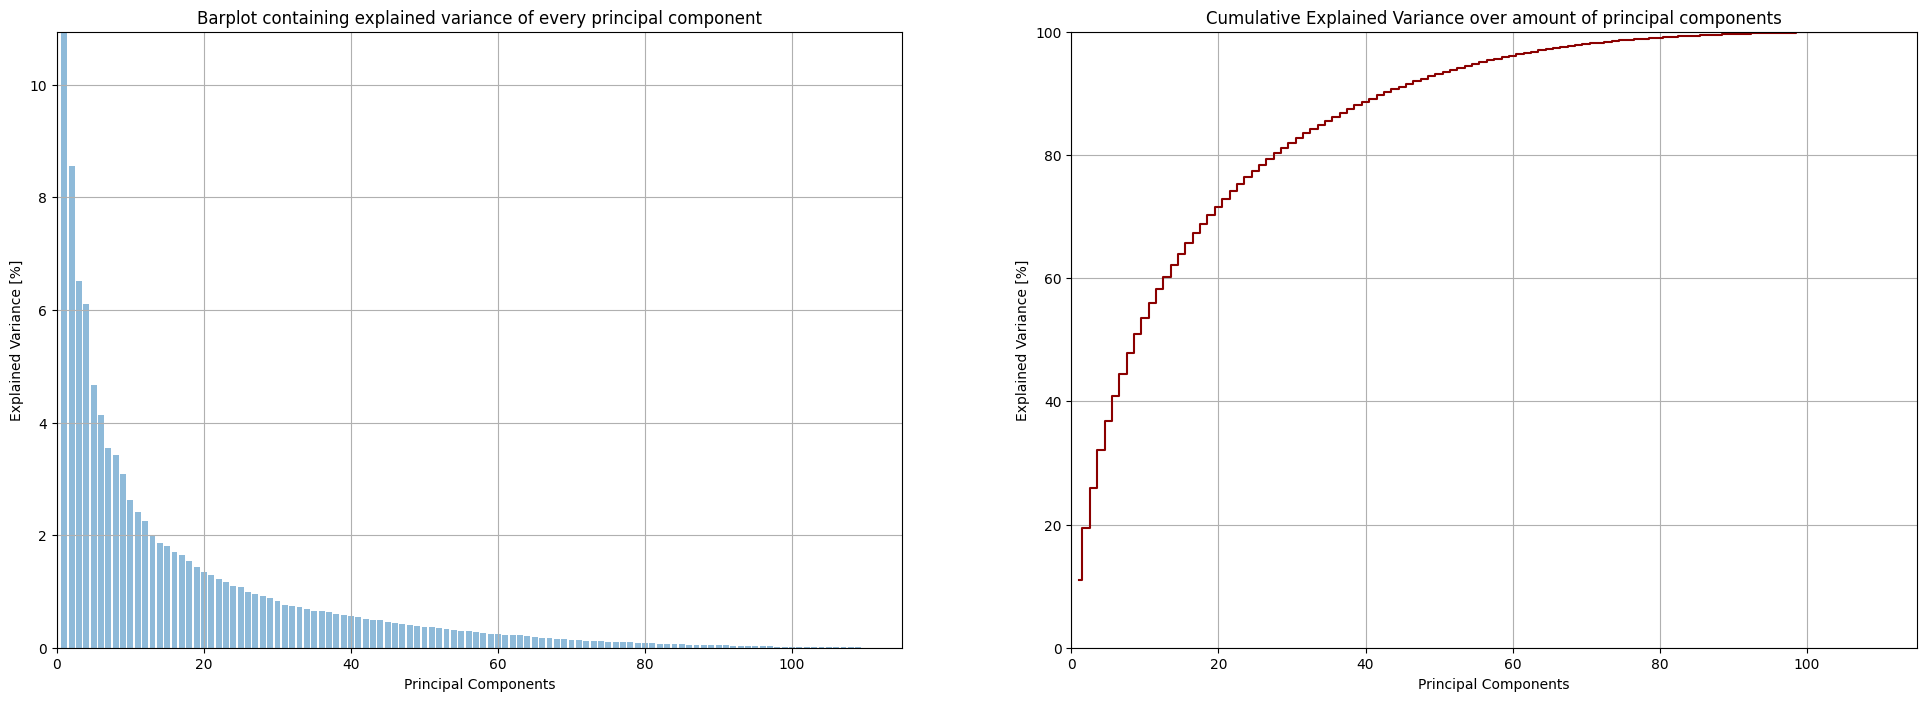

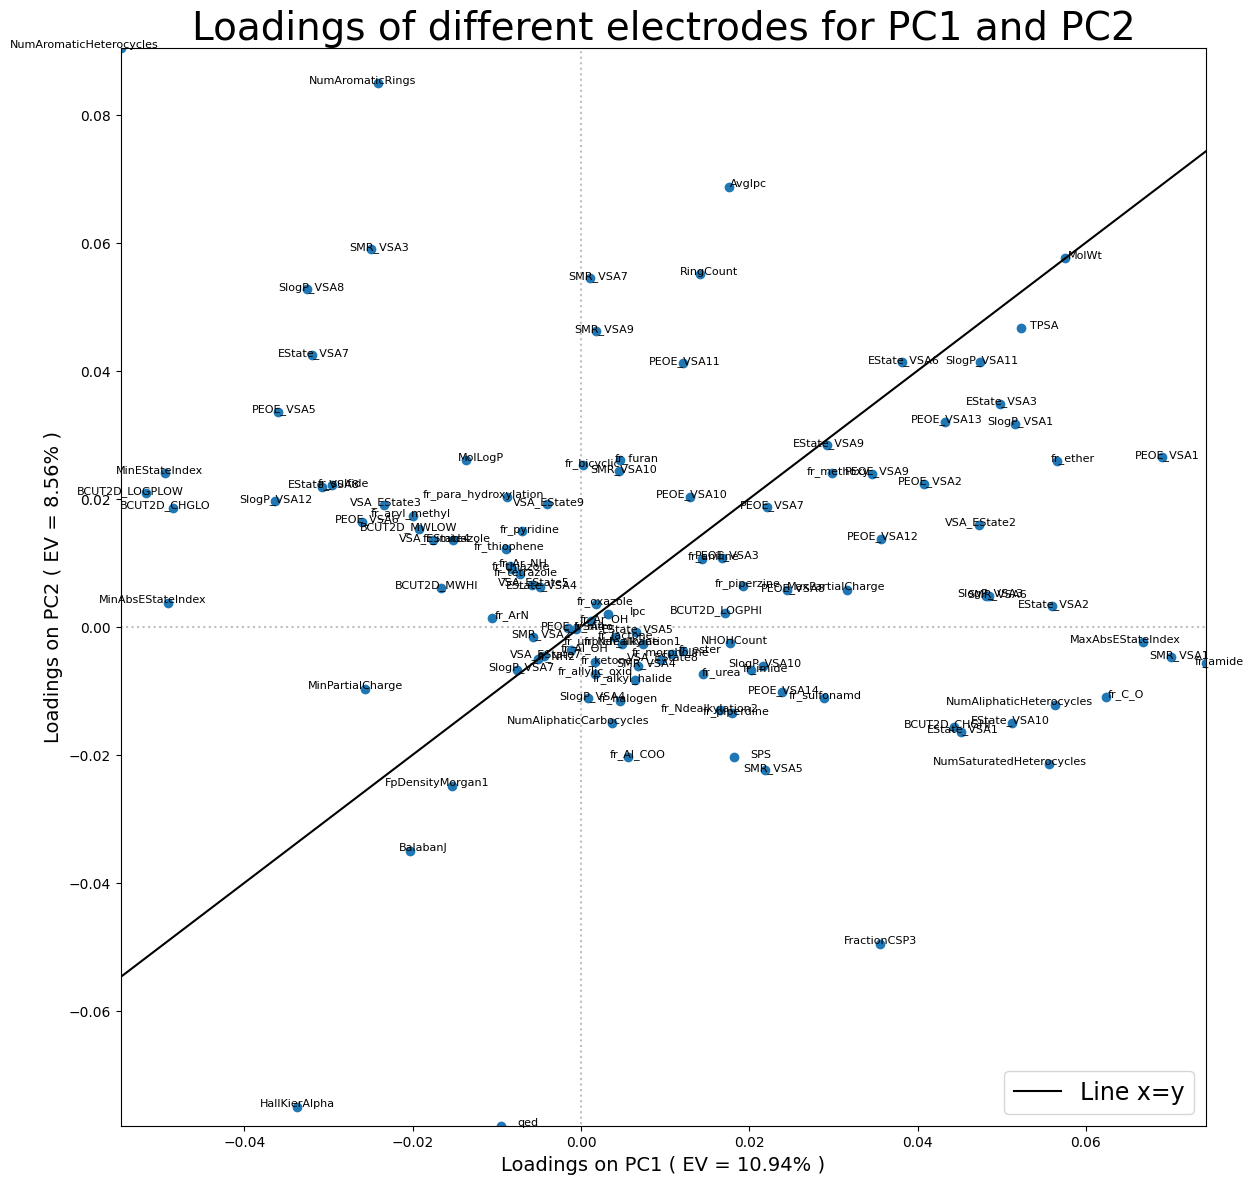

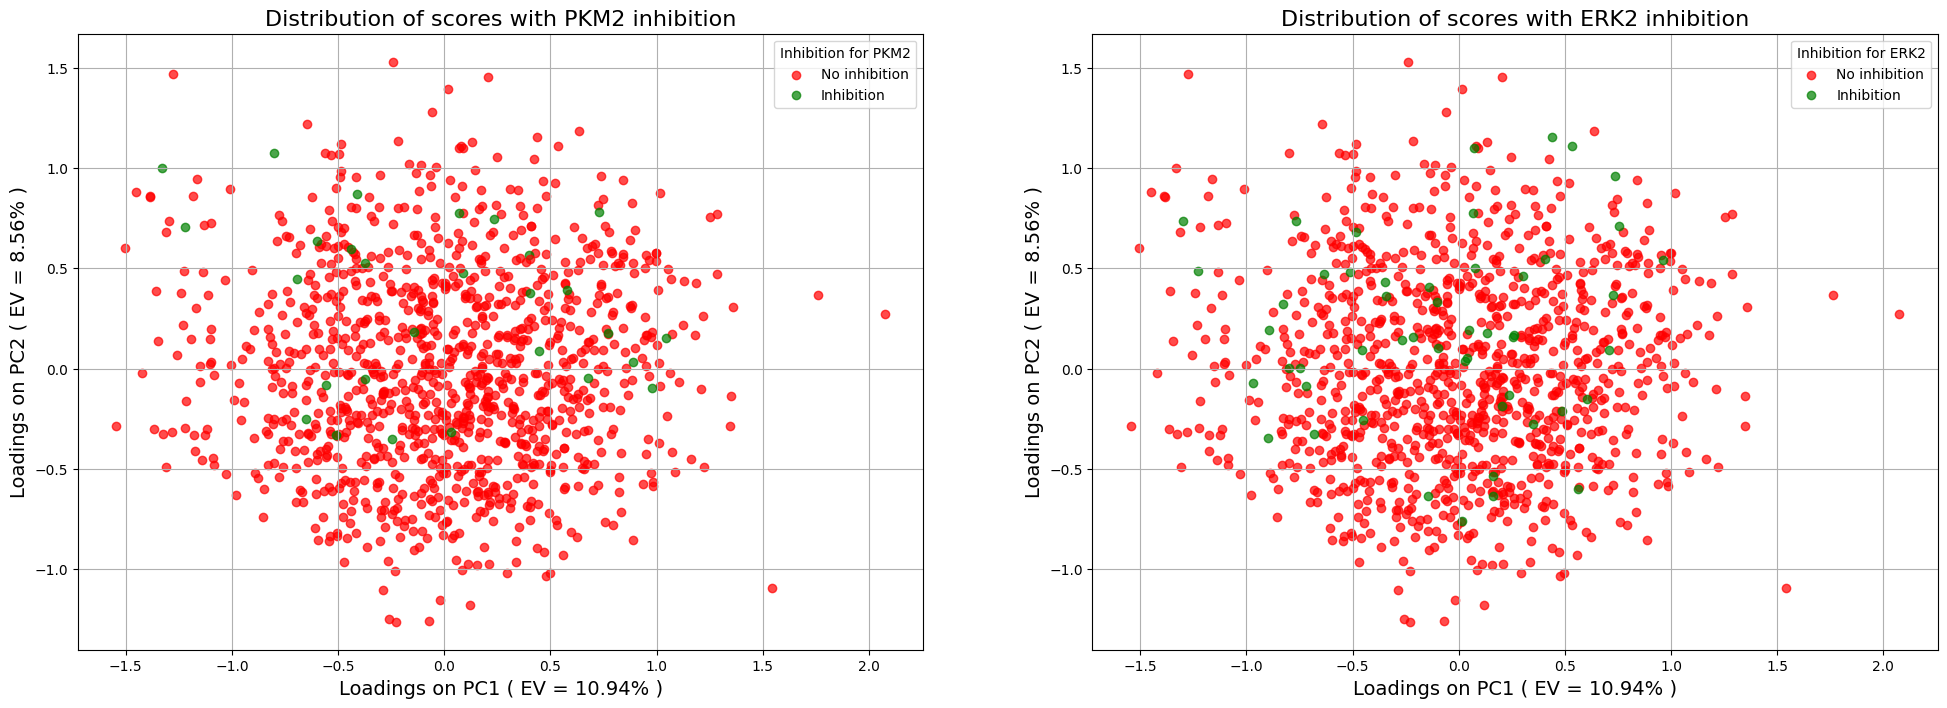

In [7]:
all_PCA_steps(df_desc_2d)

Principal component 1 Explains 9.898571344613806 % of all variance
The total amount of explained variance for 1 Principal components equals 9.898571344613806 %
Principal component 2 Explains 9.389058508295257 % of all variance
The total amount of explained variance for 2 Principal components equals 19.287629852909063 %
Principal component 3 Explains 6.635780011932551 % of all variance
The total amount of explained variance for 3 Principal components equals 25.923409864841616 %
Principal component 4 Explains 5.7165213413226965 % of all variance
The total amount of explained variance for 4 Principal components equals 31.639931206164313 %
Principal component 5 Explains 4.247478243930284 % of all variance
The total amount of explained variance for 5 Principal components equals 35.8874094500946 %
Principal component 6 Explains 3.6975365508918285 % of all variance
The total amount of explained variance for 6 Principal components equals 39.58494600098643 %
Principal component 7 Explains 3.166

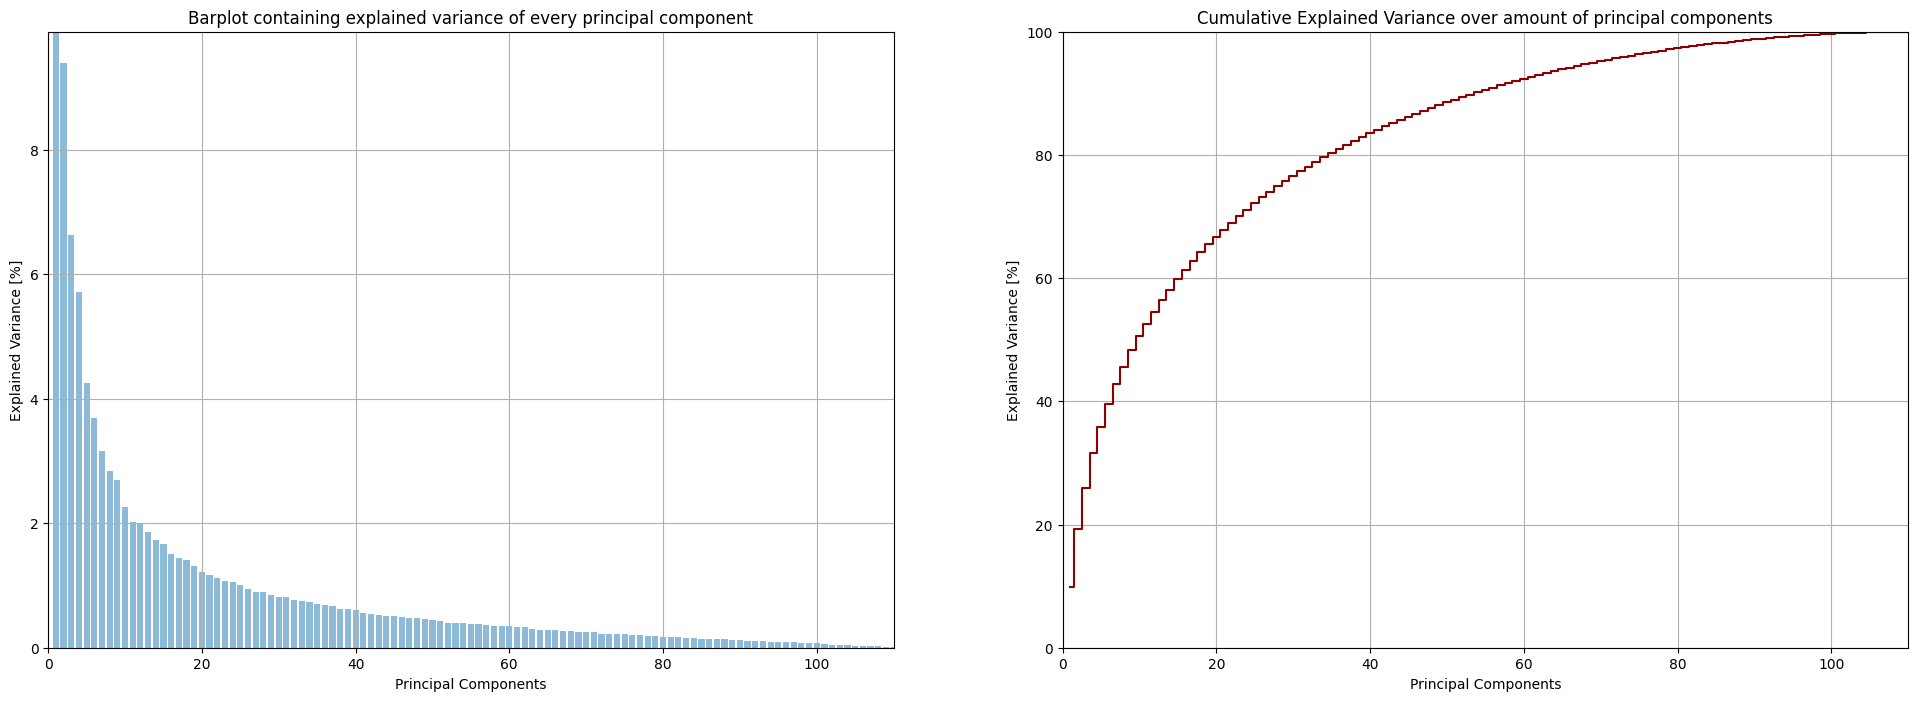

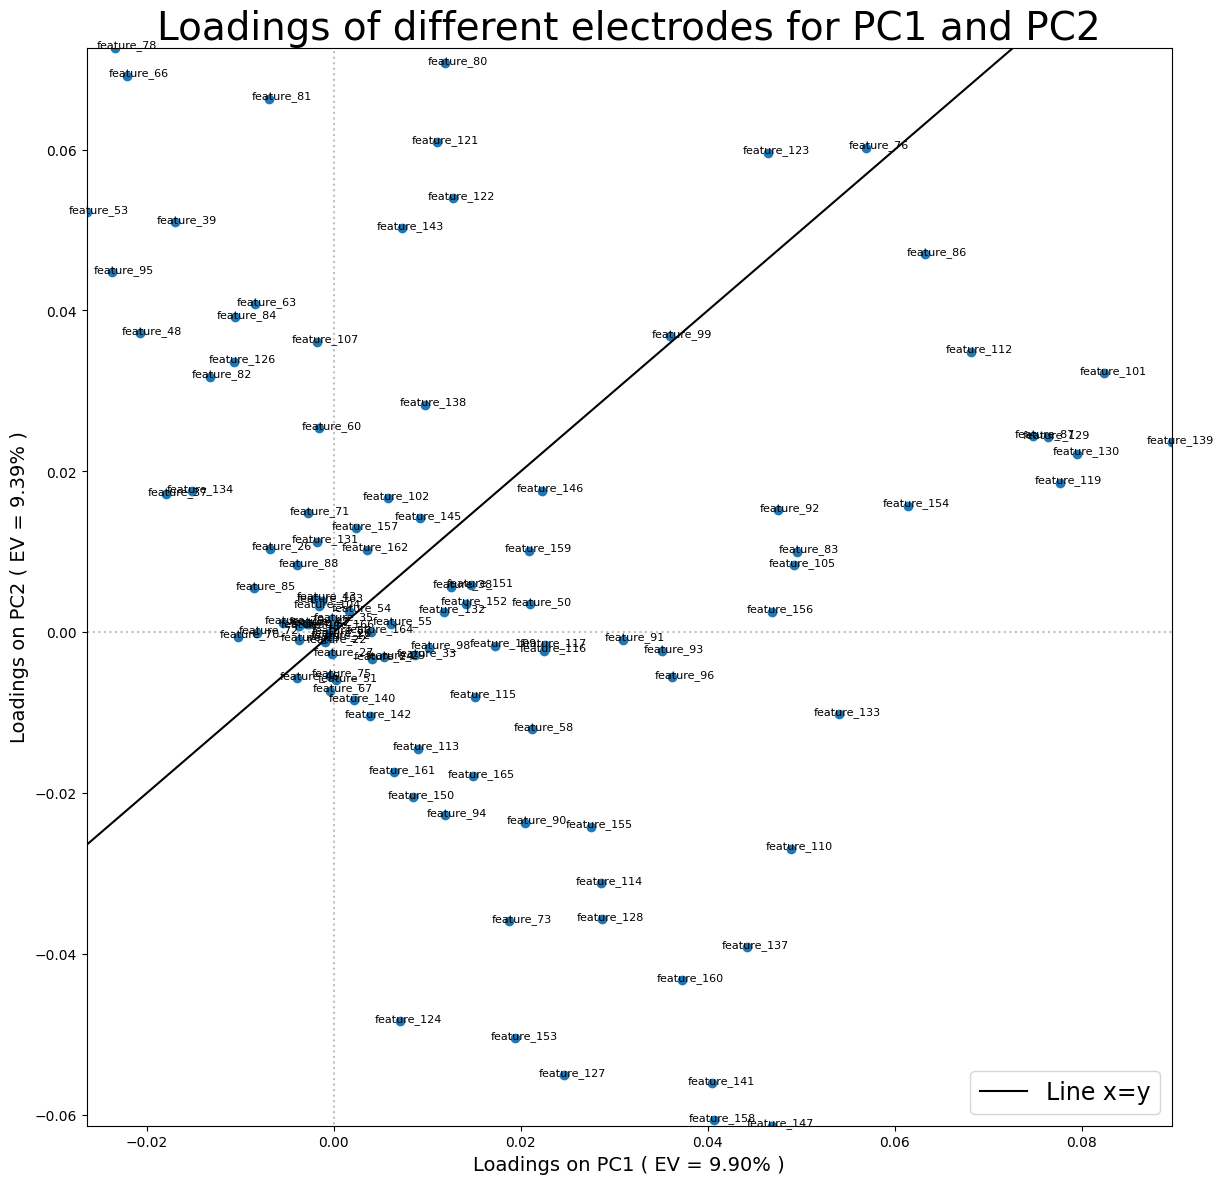

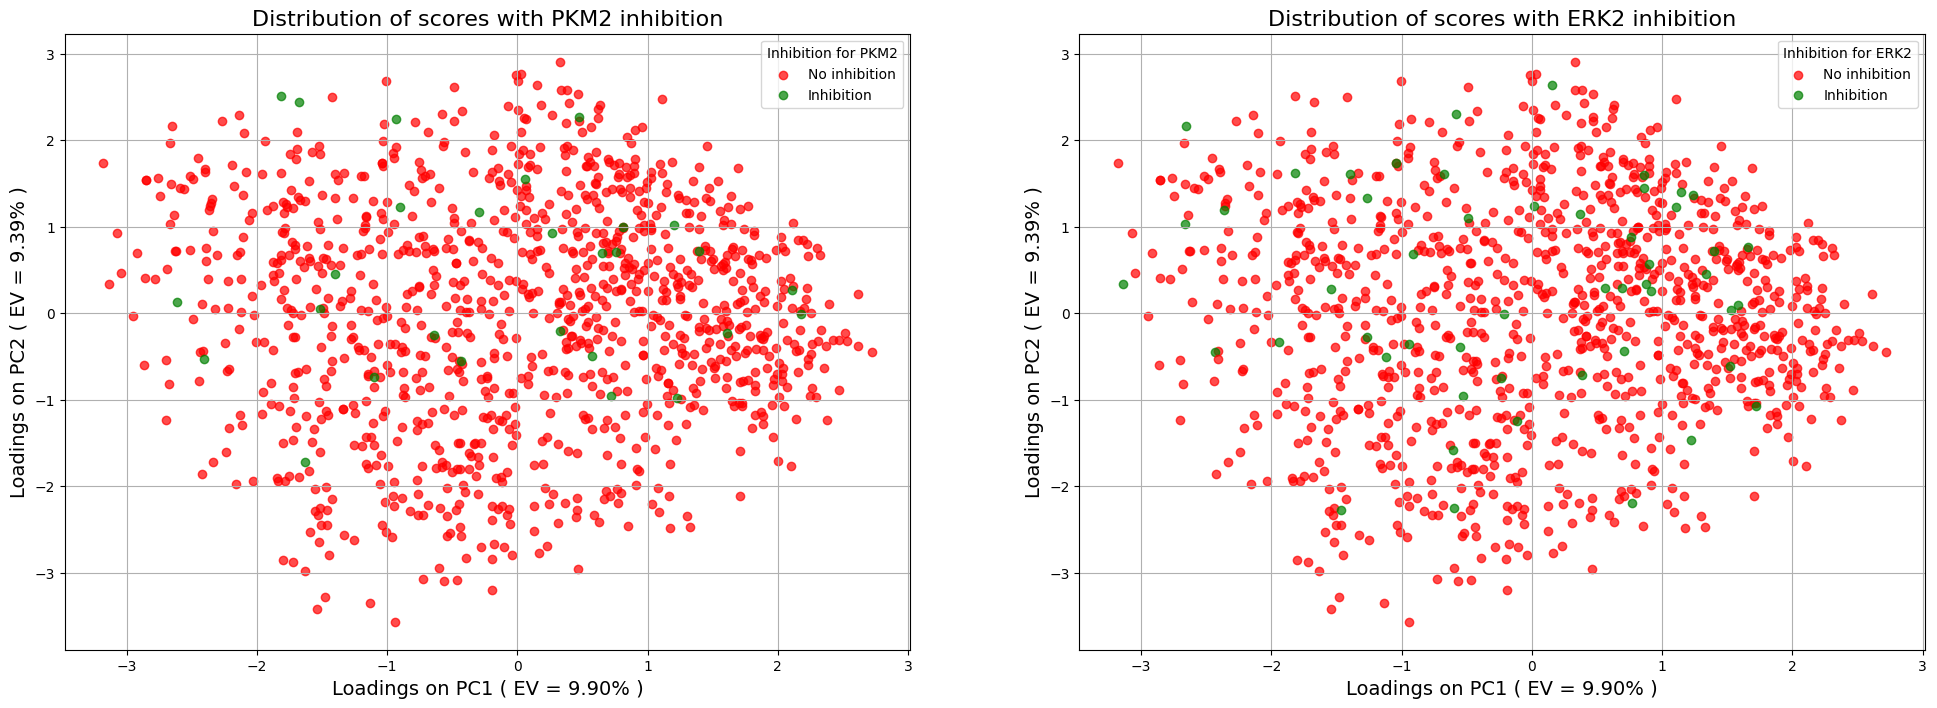

In [8]:
all_PCA_steps(df_maccs)

Principal component 1 Explains 2.1405227742928514 % of all variance
The total amount of explained variance for 1 Principal components equals 2.1405227742928514 %
Principal component 2 Explains 1.9474758752881876 % of all variance
The total amount of explained variance for 2 Principal components equals 4.087998649581039 %
Principal component 3 Explains 1.6754112431505244 % of all variance
The total amount of explained variance for 3 Principal components equals 5.763409892731564 %
Principal component 4 Explains 1.4335991194454776 % of all variance
The total amount of explained variance for 4 Principal components equals 7.197009012177041 %
Principal component 5 Explains 1.415241814668478 % of all variance
The total amount of explained variance for 5 Principal components equals 8.61225082684552 %
Principal component 6 Explains 1.3319803647426587 % of all variance
The total amount of explained variance for 6 Principal components equals 9.944231191588178 %
Principal component 7 Explains 1.25

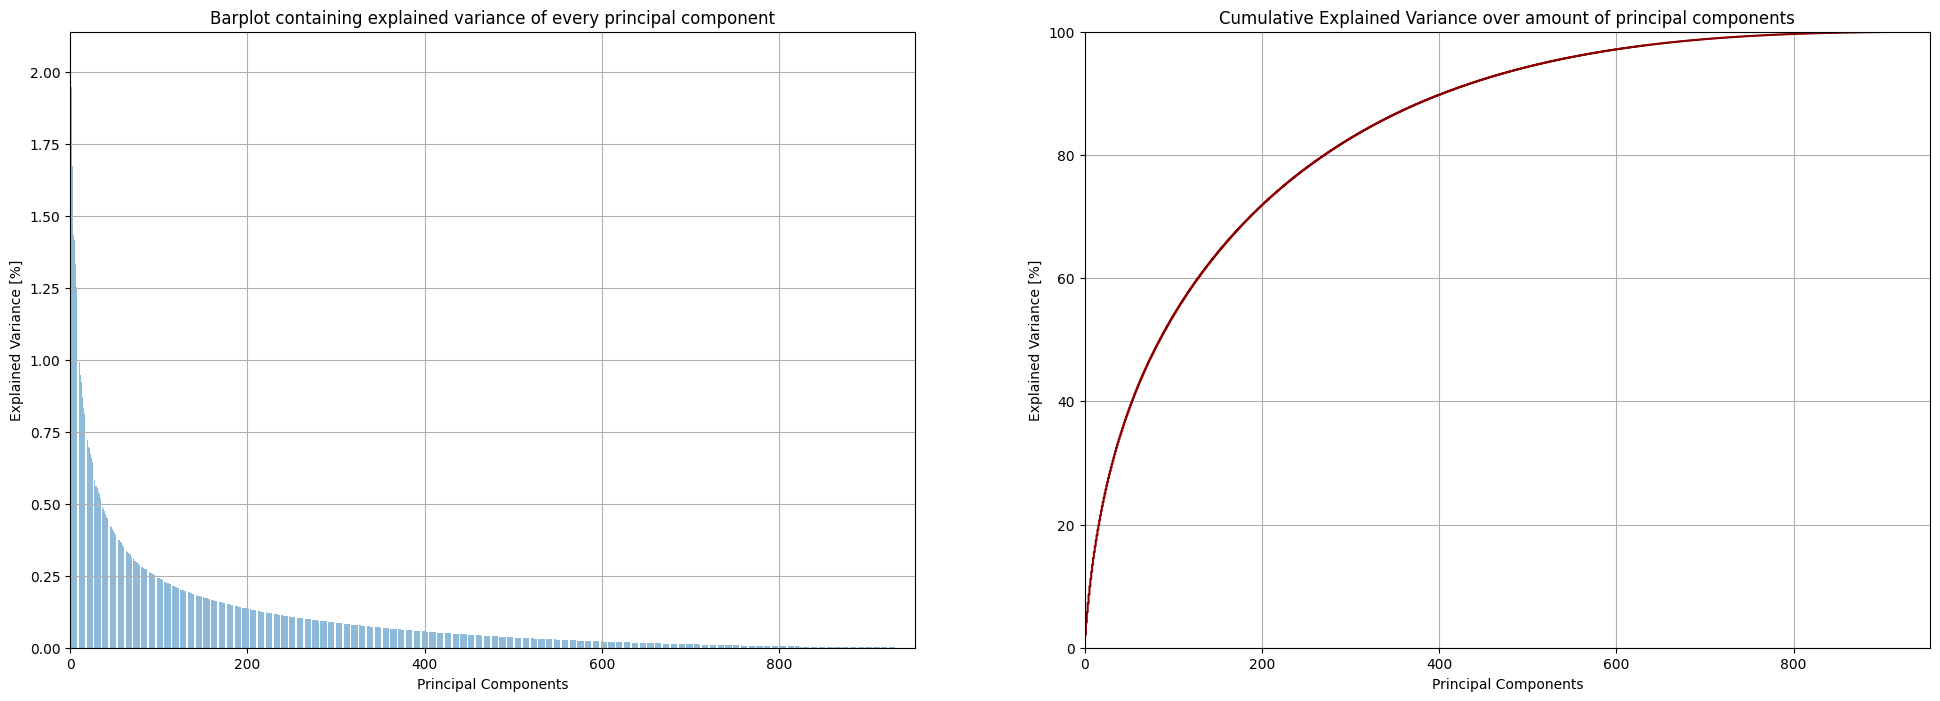

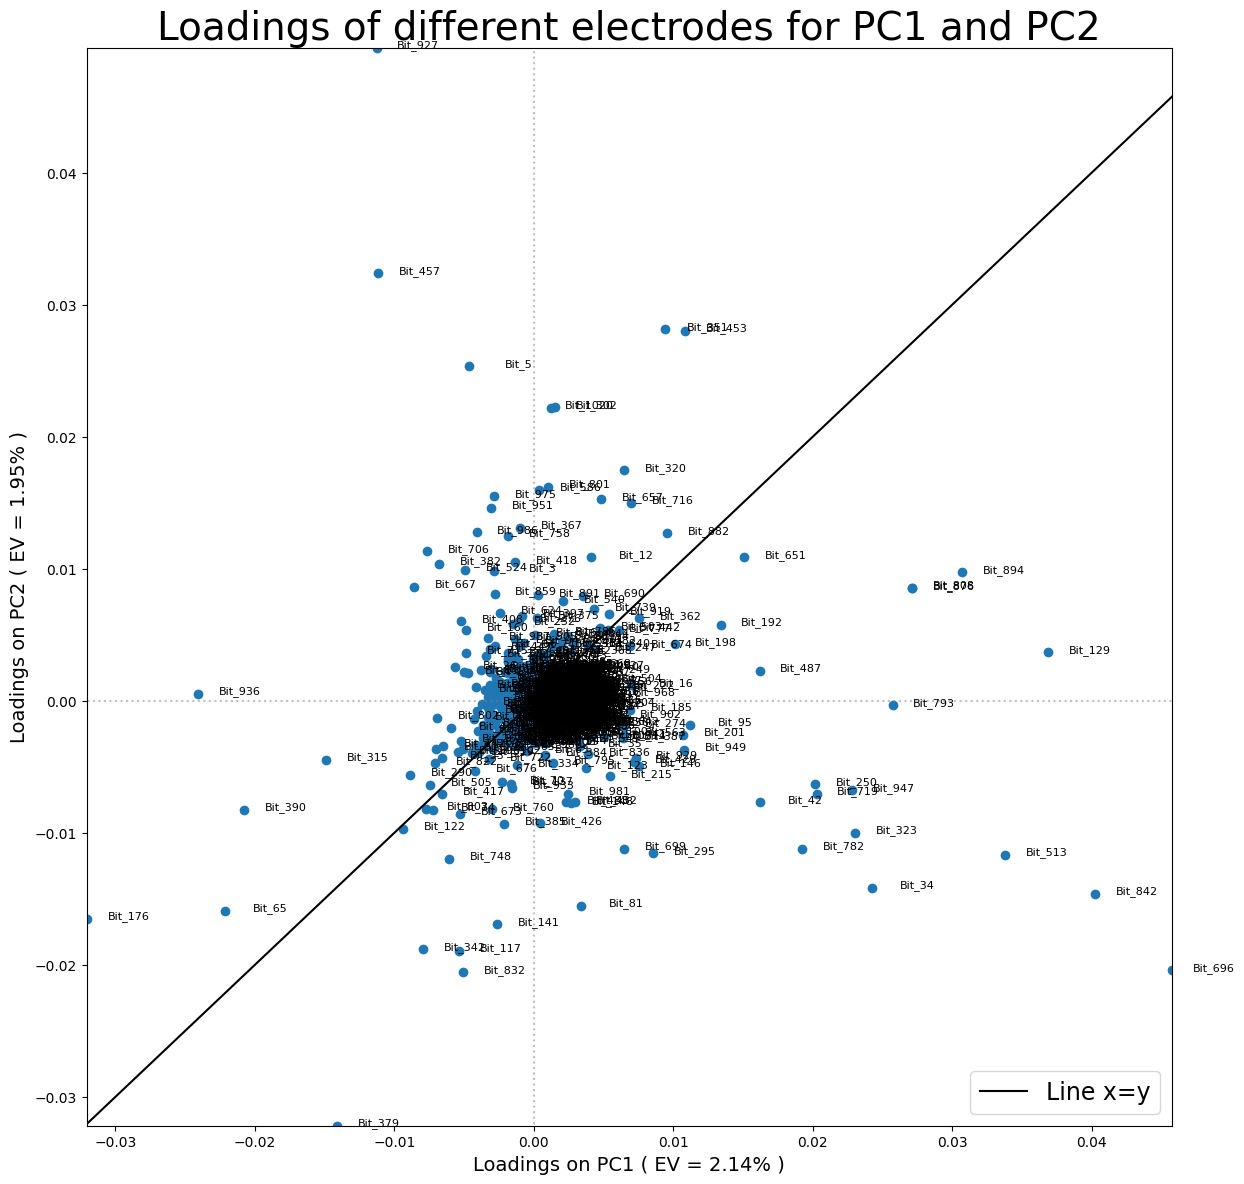

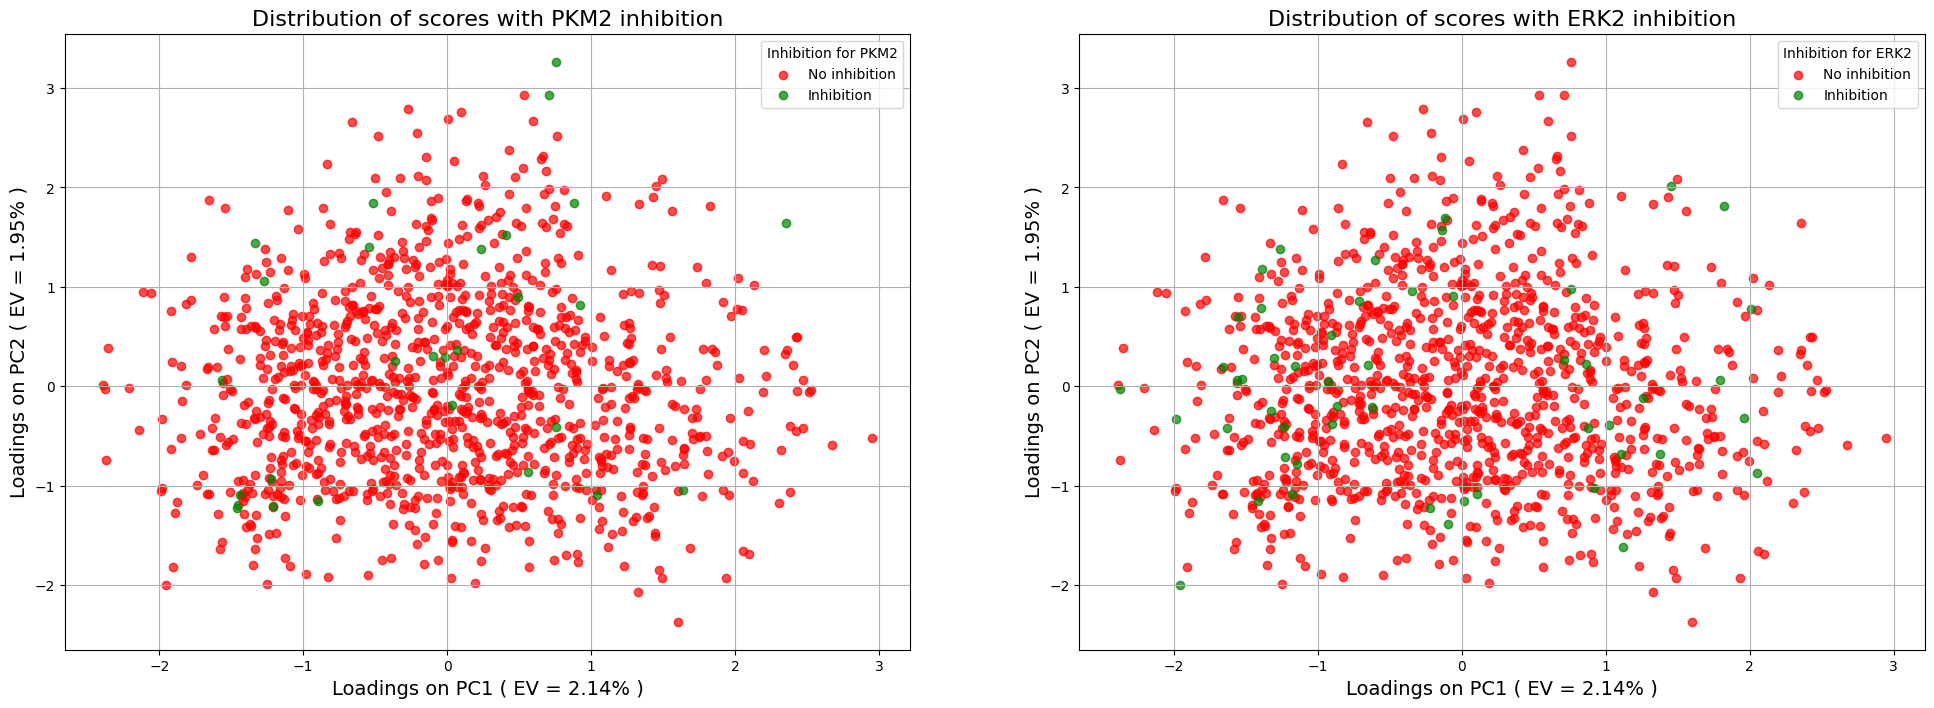

In [9]:
all_PCA_steps(df_fprint)

Principal component 1 Explains 21.366945749920447 % of all variance
The total amount of explained variance for 1 Principal components equals 21.366945749920447 %
Principal component 2 Explains 15.210838643299828 % of all variance
The total amount of explained variance for 2 Principal components equals 36.57778439322028 %
Principal component 3 Explains 10.417225546155223 % of all variance
The total amount of explained variance for 3 Principal components equals 46.9950099393755 %
Principal component 4 Explains 7.954168383211385 % of all variance
The total amount of explained variance for 4 Principal components equals 54.949178322586874 %
Principal component 5 Explains 5.918813938268761 % of all variance
The total amount of explained variance for 5 Principal components equals 60.867992260855644 %
Principal component 6 Explains 5.208118497627913 % of all variance
The total amount of explained variance for 6 Principal components equals 66.07611075848355 %
Principal component 7 Explains 3.97

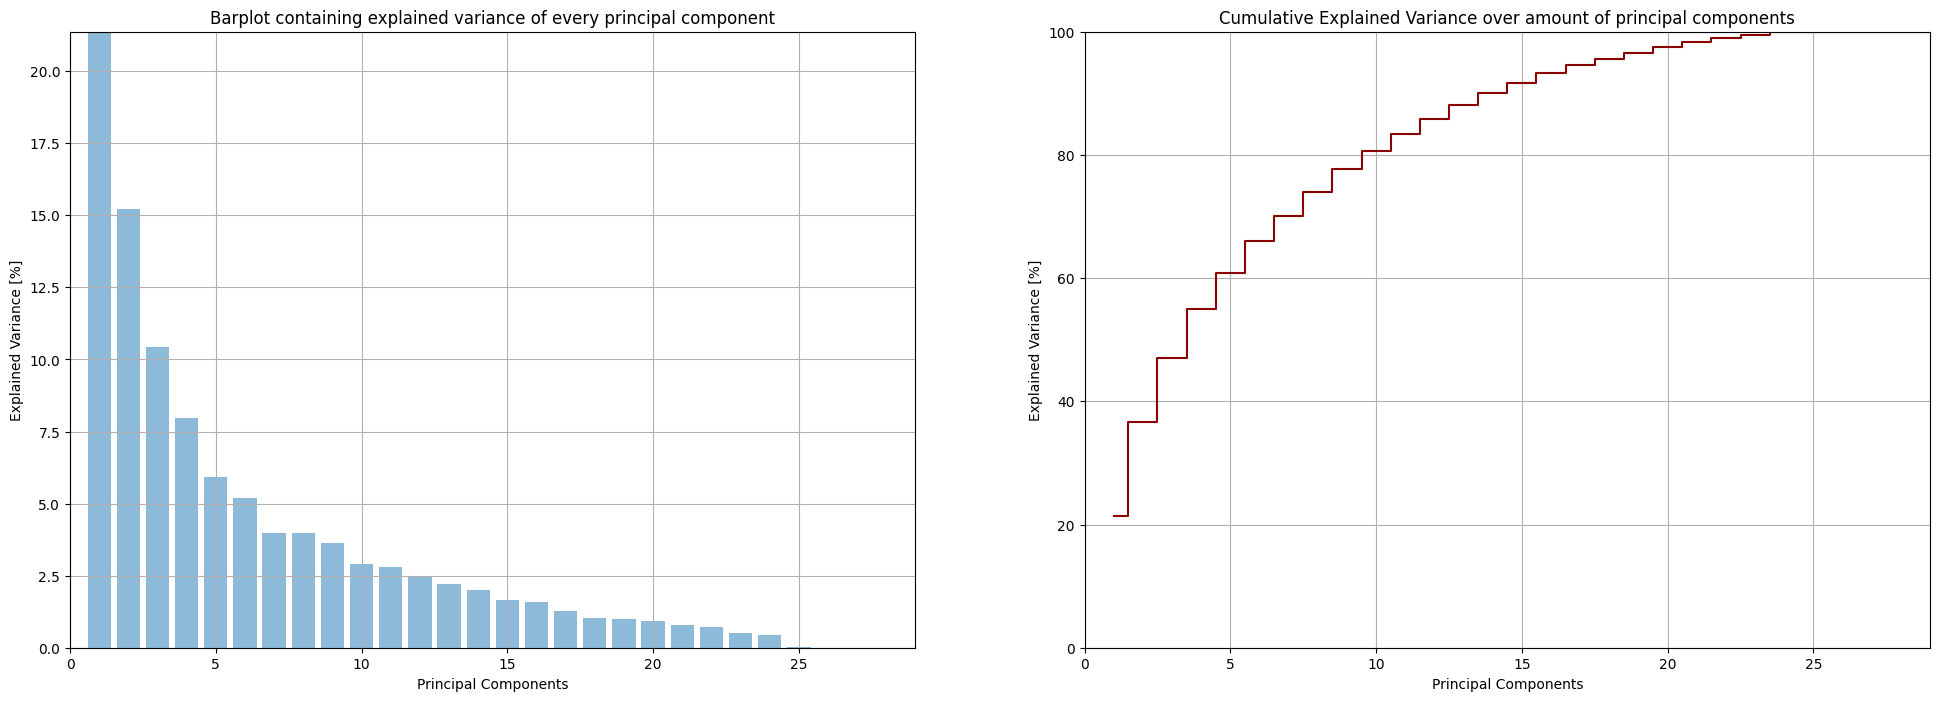

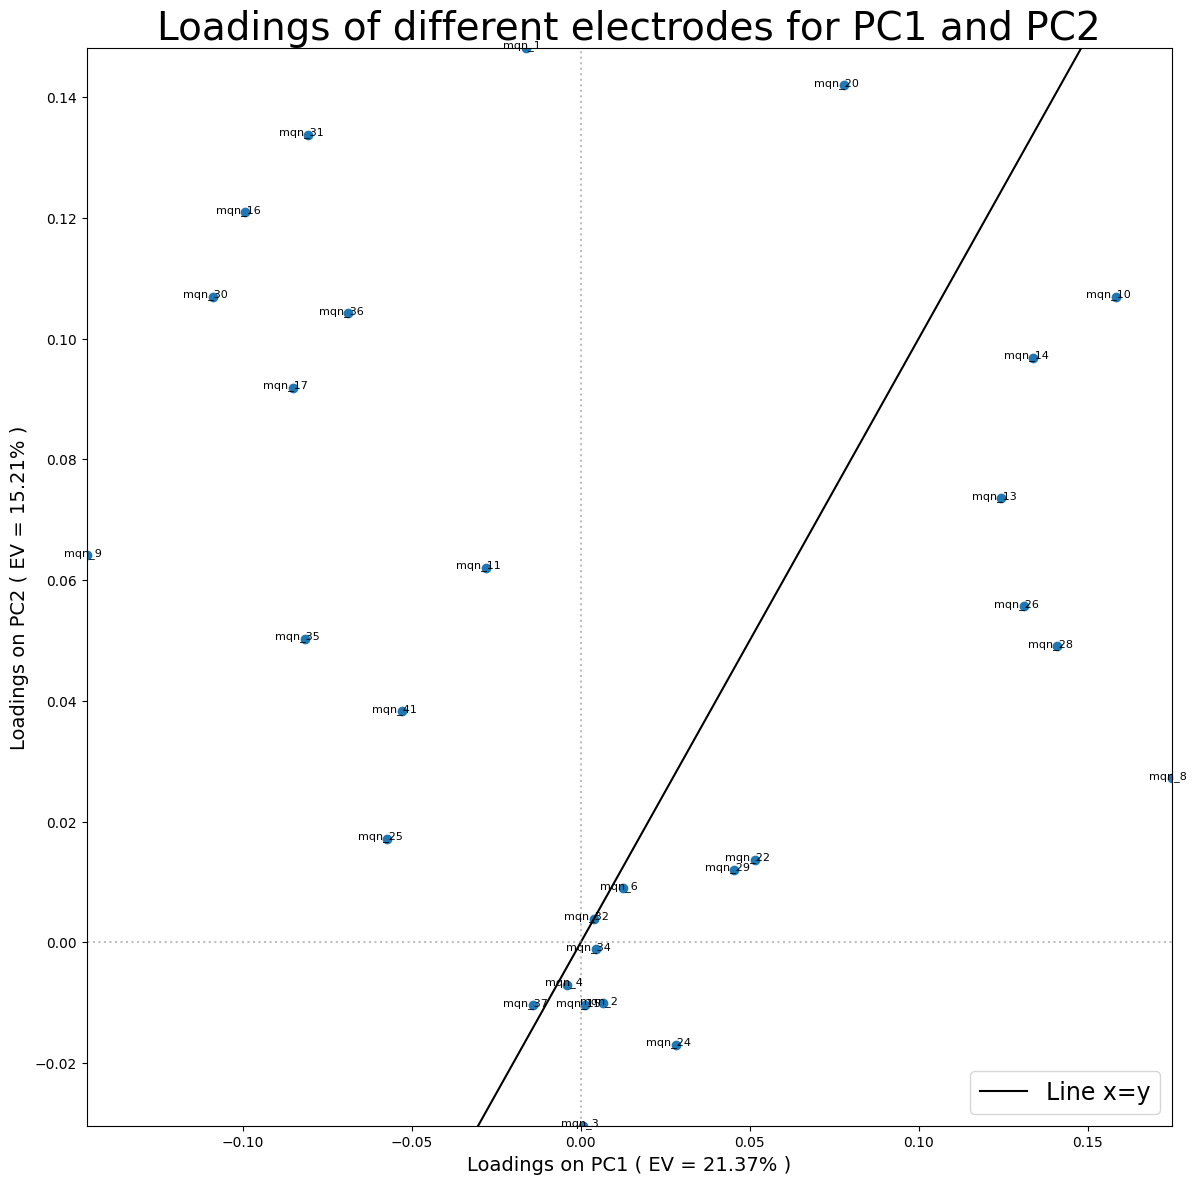

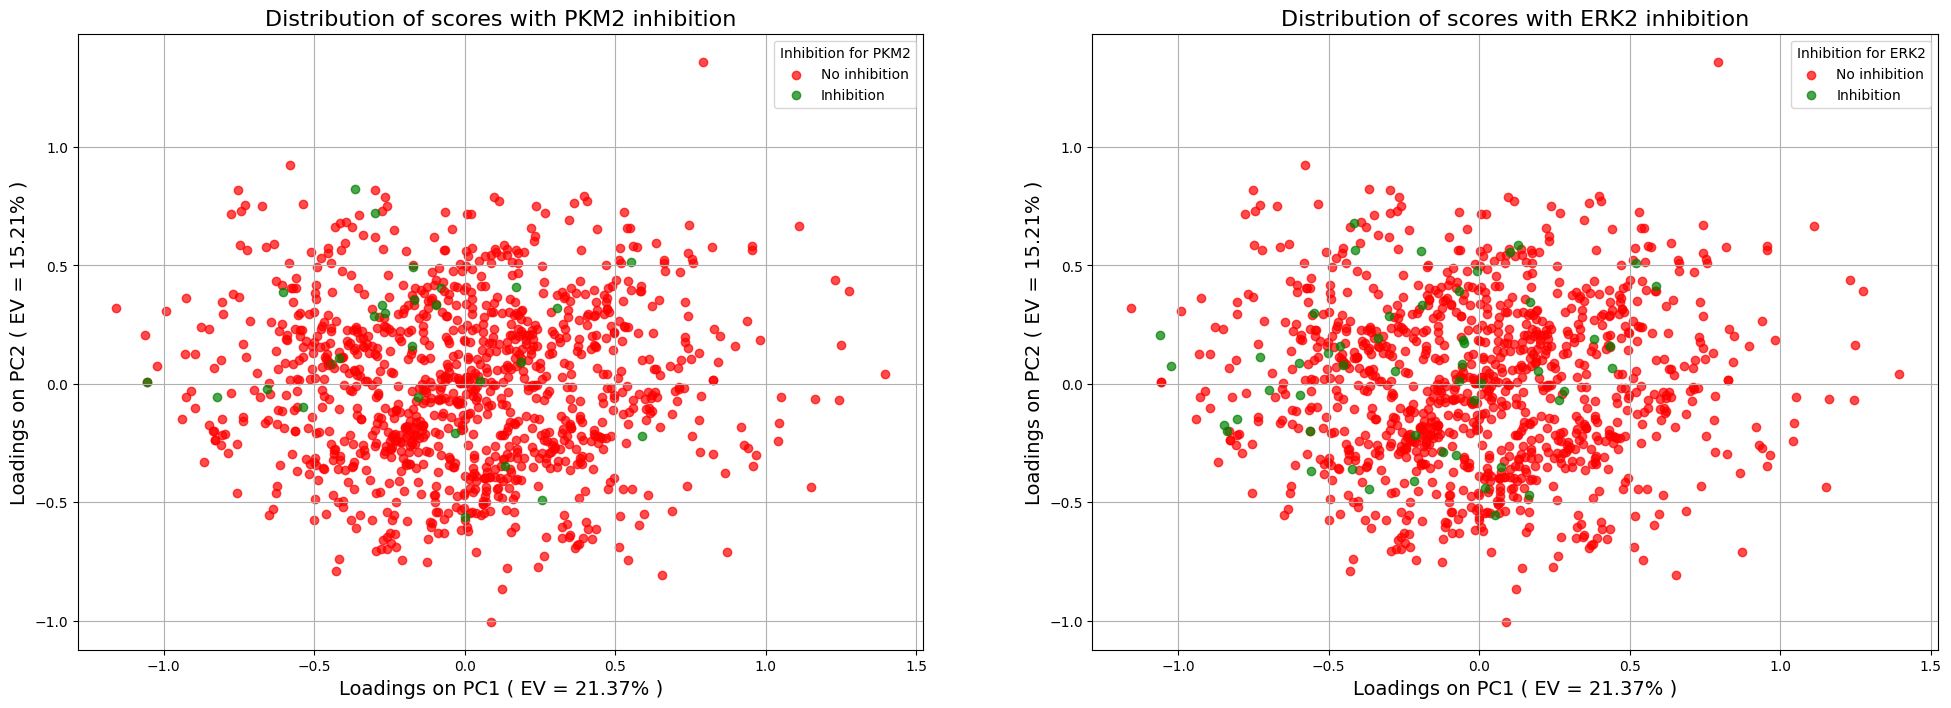

In [10]:
all_PCA_steps(df_mqn)0

In [12]:
def perform_pca_and_save(data, output_file):
    '''perform pca, determine the number of components that explain 80% of the variance, 
       perform pca with this number of components, export principal components to csv
    '''
    
    scale_method = 'MinMax'
    scaled_df = ScaleData(data, mode=scale_method)

    pca = PCA()
    pca.fit(scaled_df)

    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    num_components = np.where(cumulative_variance >= 0.90)[0][0] + 1

    pca_optimal = PCA(n_components=num_components)
    principal_components = pca_optimal.fit_transform(scaled_df)

    principal_components_df = pd.DataFrame(data=principal_components, 
                                    columns=[f'PC{i+1}' for i in range(num_components)])

    principal_components_df.to_csv(output_file, index=False)
    
    return principal_components_df

In [13]:
pca_desc_2d = perform_pca_and_save(df_desc_2d, 'data\pca_desc_2d.csv')
pca_maccs = perform_pca_and_save(df_maccs, 'data\pca_maccs.csv')
pca_fprint = perform_pca_and_save(df_fprint, 'data\pca_fprint.csv')
pca_mqn = perform_pca_and_save(df_mqn, 'data\pca_mqn.csv')